<a href="https://colab.research.google.com/github/sachinprabhu007/ML-Expriments/blob/master/Visualization_of_Linear_Regression_on_Tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the dependencies

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
# define the parameter 

learning_parameter = 0.01
epochs  = 300

In [0]:
# creating the dataset of linear regression
# here the line is y = Ax

sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

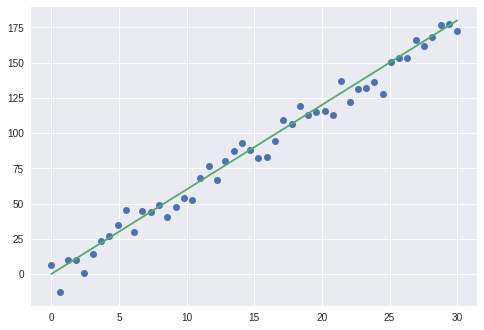

In [4]:
#noisy dataset

plt.plot(x_train, y_train,'o')


#noise free dataset
plt.plot(x_train, 6*x_train)
plt.show()

In [0]:
# Define the tensorflow definitions

Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

# Create the model for regression

with tf.name_scope("Model") as scope:
  prediction = W*X + B
  
#Add summary to study behavior of weights and biases with epochs

weight_histogram = tf.summary.histogram('Weights',W)
bias_histogram = tf.summary.histogram('Bias', B)

#cost function

with tf.name_scope('Cost_function') as scope:
  cost_iteration = tf.reduce_sum((prediction - Y) ** 2) / (2 * sample_points)
  
# Record the scalar summary of the cost function
cost_summary = tf.summary.scalar('Cost',cost_iteration)


# Define the optimizer
with tf.name_scope('Training') as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)
  
#Initialize the variables

init = tf.global_variables_initializer()

#Merge all the summaries into a single operator

merged_summary = tf.summary.merge_all()

# merge all summaries - summed together and  tagged into one variable 
#       - weight,bias and cost summary

Epochs 0.000000 Cost 0.099985 Weight 5.599303 Bias 1.082951
Epochs 40.000000 Cost 0.245425 Weight 5.877380 Bias 0.856701
Epochs 80.000000 Cost 0.248805 Weight 5.885884 Bias 0.635605
Epochs 120.000000 Cost 0.251886 Weight 5.893584 Bias 0.435397
Epochs 160.000000 Cost 0.254694 Weight 5.900557 Bias 0.254104
Epochs 200.000000 Cost 0.257249 Weight 5.906870 Bias 0.089937
Epochs 240.000000 Cost 0.259572 Weight 5.912587 Bias -0.058720
Epochs 280.000000 Cost 0.261687 Weight 5.917765 Bias -0.193334


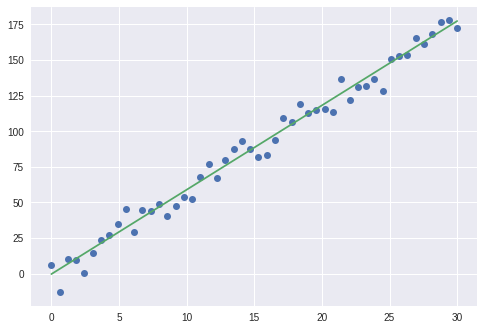

In [6]:
# Define the tensorflow session

with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log_summary',sess.graph)
  
  for epoch in range(epochs):
    for x,y in zip(x_train,y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y})
      
      #write the logs for each epochs
      
      summary_epochs = sess.run(merged_summary, feed_dict = {X:x, Y:y})
      writer.add_summary(summary_epochs, epoch)
      
    if not epoch % 40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X:x, Y:y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch,cost_iter,W1,B1))
      
  Weight = sess.run(W)
  Bias = sess.run(B)
    
  plt.plot(x_train,y_train,'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()
      

In [7]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2018-12-09 14:35:55--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.2.175.150, 52.202.60.111, 52.0.94.50, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.2.175.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  --.-KB/s    in 0.1s    

2018-12-09 14:35:56 (45.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log_summary'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
 get_ipython().system_raw('./ngrok http 6006 &')

In [10]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://7962a330.ngrok.io


In [12]:
# alternative 


!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

  Running setup.py bdist_wheel for tensorboardcolab ... - done
  Stored in directory: /root/.cache/pip/wheels/ab/74/02/cda602d1dc28b2f12eab313c49b9bfa14d6371326bc2590e06
Successfully built tensorboardcolab


Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://7962a330.ngrok.io


In [0]:
#